In [ ]:
!git clone https://github.com/ultralytics/yolov5
%cd yolov5
!pip install -r requirements.txt


Cloning into 'yolov5'...
remote: Enumerating objects: 17521, done.
remote: Counting objects: 100% (24/24), done.
remote: Compressing objects: 100% (24/24), done.
remote: Total 17521 (delta 9), reused 0 (delta 0), pack-reused 17497 (from 4)
Receiving objects: 100% (17521/17521), 16.61 MiB | 18.75 MiB/s, done.
Resolving deltas: 100% (11998/11998), done.
/content/yolov5
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 66.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 36.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 52.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

!unzip -q "/content/drive/MyDrive/Diverse_hand_gesture_dataset.zip" -d dataset


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os, shutil
from sklearn.model_selection import train_test_split

input_dir = "dataset"
output_dir = "dataset_yolo"

for split in ['train', 'val', 'test']:
    os.makedirs(f"{output_dir}/{split}/images", exist_ok=True)
    os.makedirs(f"{output_dir}/{split}/labels", exist_ok=True)

all_data = []
for root, dirs, files in os.walk(input_dir):
    for file in files:
        if file.endswith(".png"):
            label_file = os.path.splitext(file)[0] + ".txt"
            img_path = os.path.join(root, file)
            lbl_path = os.path.join(root, label_file)
            if os.path.exists(lbl_path):
                all_data.append((img_path, lbl_path))

train_data, test_data = train_test_split(all_data, test_size=0.2, random_state=42)
val_data, test_data = train_test_split(test_data, test_size=0.5, random_state=42)

def copy_data(pairs, split):
    for img, lbl in pairs:
        shutil.copy(img, f"{output_dir}/{split}/images")
        shutil.copy(lbl, f"{output_dir}/{split}/labels")

copy_data(train_data, "train")
copy_data(val_data, "val")
copy_data(test_data, "test")

print(" Dataset converted to YOLO format.")


In [ ]:
yaml_content = """
train: dataset_yolo/train/images
val: dataset_yolo/val/images

nc: 8
names: ['zero', 'dislike', 'five', 'exactly', 'two', 'three', 'left', 'like']
"""
with open("data.yaml", "w") as f:
    f.write(yaml_content)
print(" data.yaml created.")


In [ ]:
import yaml

def check_split(path):
    img_count = len(os.listdir(f"{path}/images"))
    lbl_count = len(os.listdir(f"{path}/labels"))
    print(f"📂 {path}: {img_count} images, {lbl_count} labels")
    if img_count != lbl_count:
        print("⚠️ Count mismatch!")
    else:
        print("✅ Image-label count matches")

print("🔎 Checking dataset...")
for split in ["dataset_yolo/train", "dataset_yolo/val", "dataset_yolo/test"]:
    check_split(split)

with open("data.yaml", "r") as f:
    data_yaml = yaml.safe_load(f)
print("\n data.yaml content:", data_yaml)


🔎 Checking dataset...
📂 dataset_yolo/train: 5120 images, 5120 labels
✅ Image-label count matches
📂 dataset_yolo/val: 640 images, 640 labels
✅ Image-label count matches
📂 dataset_yolo/test: 640 images, 640 labels
✅ Image-label count matches

✅ data.yaml content: {'train': 'dataset_yolo/train/images', 'val': 'dataset_yolo/val/images', 'nc': 8, 'names': ['zero', 'dislike', 'five', 'exactly', 'two', 'three', 'left', 'like']}


In [ ]:
!WANDB_MODE=disabled python train.py --img 640 --batch 16 --epochs 10 --data /content/data.yaml --weights yolov5s.pt


Streaming output truncated to the last 5000 lines.
        2/9      4.55G    0.04065    0.01336    0.03449         35        640:  28% 89/320 [00:32<01:16,  3.03it/s]/content/yolov5/train.py:414: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(amp):
        2/9      4.55G    0.04062    0.01335    0.03441         31        640:  28% 90/320 [00:32<01:14,  3.08it/s]/content/yolov5/train.py:414: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(amp):
        2/9      4.55G    0.04049    0.01333    0.03426         28        640:  28% 91/320 [00:32<01:08,  3.33it/s]/content/yolov5/train.py:414: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(amp):
        2/9      4.55G     0.0405 

In [ ]:
!python /content/yolov5/detect.py \
    --weights /content/yolov5/runs/train/exp2/weights/best.pt \
    --source /content/dataset_yolo/test/images \
    --conf 0.5 \
    --project /content/yolov5/runs/detect \
    --name test_results \
    --exist-ok


detect: weights=['/content/yolov5/runs/train/exp2/weights/best.pt'], source=/content/dataset_yolo/test/images, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.5, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_format=0, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=/content/yolov5/runs/detect, name=test_results, exist_ok=True, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-423-g567c6646 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)

Fusing layers... 
Model summary: 157 layers, 7031701 parameters, 0 gradients, 15.8 GFLOPs
image 1/640 /content/dataset_yolo/test/images/1.png: 640x640 1 zero, 11.5ms
image 2/640 /content/dataset_yolo/test/images/1006.png: 640x640 1 two, 11.6ms
image 3/640 /content/dataset_yolo/test/images/101.png: 640x640 1 two, 11.5ms
image 4/640 /content/dataset_

In [ ]:
import glob

detect_dirs = sorted(glob.glob('/content/yolov5/runs/detect/*'), key=lambda x: x.split('/')[-1])
print(" Detect output folders:", detect_dirs)


📂 Detect output folders: ['/content/yolov5/runs/detect/test_results']


In [ ]:
!python /content/yolov5/detect.py \
    --weights /content/yolov5/runs/train/exp2/weights/best.pt \
    --source /content/dataset_yolo/test/images \
    --conf 0.1 \
    --project /content/yolov5/runs/detect \
    --name test_results \
    --exist-ok


detect: weights=['/content/yolov5/runs/train/exp2/weights/best.pt'], source=/content/dataset_yolo/test/images, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.1, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_format=0, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=/content/yolov5/runs/detect, name=test_results, exist_ok=True, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-423-g567c6646 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)

Fusing layers... 
Model summary: 157 layers, 7031701 parameters, 0 gradients, 15.8 GFLOPs
image 1/640 /content/dataset_yolo/test/images/1.png: 640x640 1 zero, 11.5ms
image 2/640 /content/dataset_yolo/test/images/1006.png: 640x640 1 two, 11.6ms
image 3/640 /content/dataset_yolo/test/images/101.png: 640x640 1 two, 11.5ms
image 4/640 /content/dataset_

Found 640 result images.


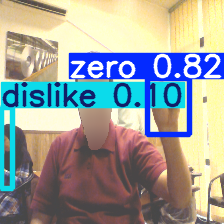

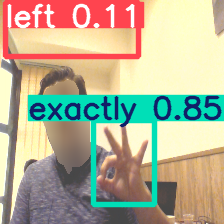

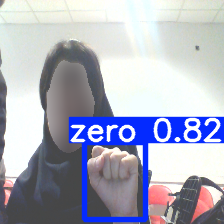

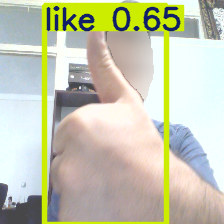

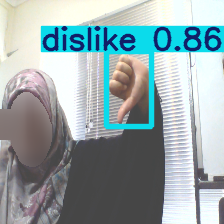

In [ ]:
import glob
from IPython.display import Image, display

result_images = glob.glob('/content/yolov5/runs/detect/test_results/*.png')

print(f"Found {len(result_images)} result images.")

for img_path in result_images[:5]:
    display(Image(filename=img_path))


In [ ]:
!ls -lh /content/yolov5/runs/train/exp*/weights/


/content/yolov5/runs/train/exp2/weights/:
total 28M
-rw-r--r-- 1 root root 14M Aug  8 14:37 best.pt
-rw-r--r-- 1 root root 14M Aug  8 14:37 last.pt

/content/yolov5/runs/train/exp/weights/:
total 0
